# Titanic - Machine Learning from Disaster
Start here! Predict survival on the Titanic and get familiar with ML basics

Dalam Final Project ini, akan disusun sebuah model Machine Learning sederhana untuk menentukan penumpang mana yang survived dalam tragedi Titanic. Data yang digunakan adalah data dari kaggle.com. Data tersebut berisi data penumpang Titanic mulai dari 

Secara singkat, yang akan dilakukan dalam notebook ini adalah sebagai berikut
1. Preprocessing Data
2. Exploring Data by Feature
3. Model Comparation
4. Model Deployment

## Preprocessing Data

Pada bagian ini kita akan melakukan importing libraries yang diperlukan, import data, data cleaning, dan sebagainya

In [1]:
# Pre-config agar tabel yang ditampilkan left-aligned
%%html
<style>
    /* Jupyter */
    .rendered_html table,
    /* Jupyter Lab*/
    div[data-mime-type="text-markdown"] table {
        margin-left: 0
    }
</style>

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle
import scipy.stats as st
import statsmodels.api as sm

%matplotlib inline

In [3]:
# Load Dataset
df = pd.read_csv('dataset/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Dictionary

Penjelasan dari masing-masing kolom dalam dataset adalah sebagai berikut:

| Variable | Definition | Key |
| :---: | :---: | :---: |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket Number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southamton |



### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
# Drop kolom PassengerId, Name, Cabin data-data tersebut tidak bermanfaat dalam analisis
df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [23]:
# Mengisi data yang kosong di kolom Age menggunakan mean
df.fillna(df.mean(), inplace=True)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Exploring Data per Features

Pada bagian ini, kita akan melihat distribusi data dari masing-masing features dengan visualisasi

In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


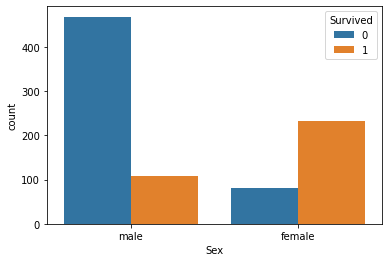

In [10]:
sns.countplot('Sex', hue='Survived', data=df)
plt.show()

Dari data tersebut, dapat dilihat bahwa **female passenger more likely untuk survived dibandingkan male passenger**

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


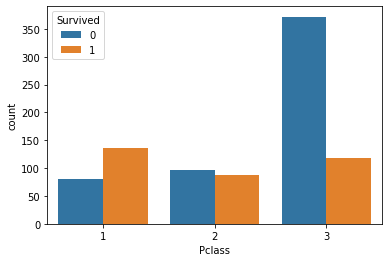

In [11]:
sns.countplot('Pclass', hue='Survived', data=df)
plt.show()

Dari data Pclass, dapat dilihat bahwa **penumpang kelas 1 more likely untuk survived dibandingkan kelas lainnya**

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


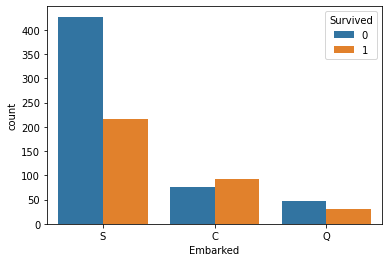

In [12]:
sns.countplot('Embarked', hue='Survived', data=df)
plt.show()

Dari data lokasi keberangkatan, dapat dilihat bahwa **penumpang yang berangkat dari Cherbourg (C) more likely untuk survived dibanding penumpang lainnya**

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


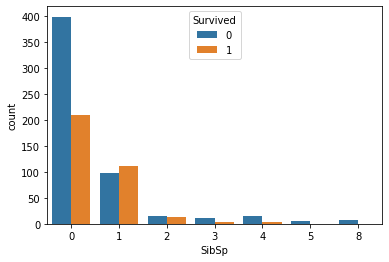

In [13]:
sns.countplot('SibSp', hue='Survived', data=df)
plt.show()

Dari data jumlah siblings/spouse, dapat dilihat bahwa **penumpang yang memiliki sibling/spouce 1-2 more likely untuk survived dibanding penumpang lainnya**

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


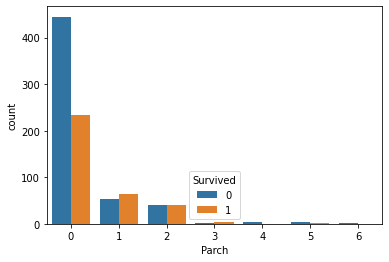

In [14]:
sns.countplot('Parch', hue='Survived', data=df)
plt.show()

Dari data jumlah siblings/spouse, dapat dilihat bahwa **penumpang yang bersama parents 1-3 more likely untuk survived dibanding penumpang lainnya**

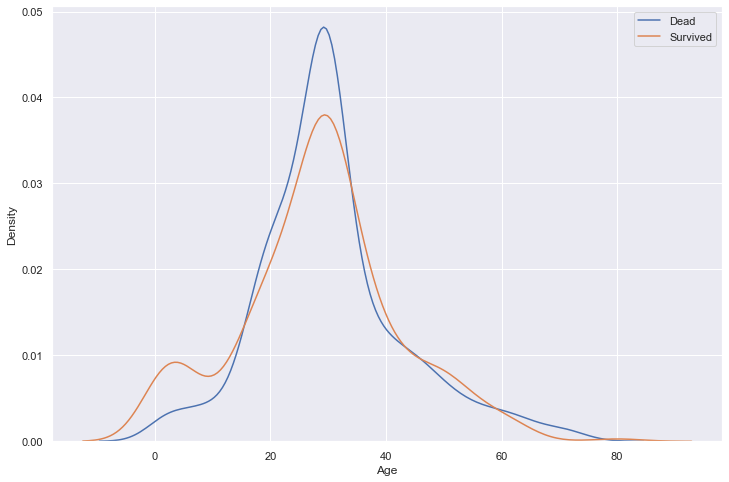

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(df.Age[df.Survived==0])
sns.kdeplot(df.Age[df.Survived==1])
plt.legend(["Dead", "Survived"])
plt.xlabel("Age")
plt.show()

Dari data usia, dapat dilihat bahwa:
- **Penumpang dengan usia 0 - 10 tahun more likely untuk survived dibanding penumpang lainnya**
- **Penumpang dengan usia 10 - 35 tahun more likely untuk dead dibanding penumpang lainnya**

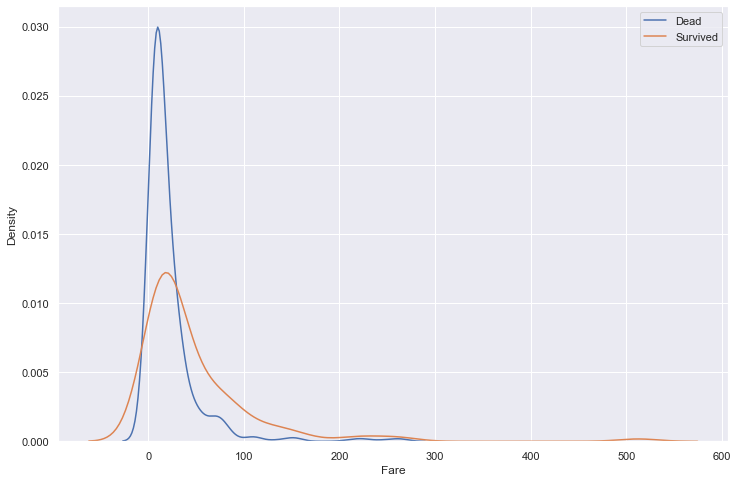

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(df.Fare[df.Survived==0])
sns.kdeplot(df.Fare[df.Survived==1])
plt.legend(["Dead", "Survived"])
plt.xlabel("Fare")
plt.show()

Dari data Fare (Harga tiket, dapat dilihat bahwa **semakin tinggi harga tiket penumpang more likely untuk survived**

## Model Development and Comparation

Pada bagian ini, kita akan mendevelop beberapa model Machile Learning yang dapat digunakan untuk menyelesaikan masalah Titanic kemudian memilih model mana yang akan dideploy dengan mempertimbangkan tingkat akurasi dari model tersebut 

In [17]:
from sklearn.preprocessing import LabelEncoder

# Mengubah label male dan female menjadi 0 dan 1
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Mengubah label Embarked menjadi 0, 1, dan 2
df['Embarked'] = df['Embarked'].replace('C', 0)
df['Embarked'] = df['Embarked'].replace('Q', 1)
df['Embarked'] = df['Embarked'].replace('S', 2)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Menentukan variabel x dan y
x = df.drop('Survived',1)
y = df['Survived']

In [32]:
# Menentukan variabel training dan test yang akan digunakan dalam model development
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.753731343283582
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       157
           1       0.74      0.63      0.68       111

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [30]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7985074626865671
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [31]:
# Logistic Regression
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(x_train, y_train)

y_pred = LogR.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8134328358208955
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dari beberapa model klasifikasi yang digunakan, dapat dilihat bahwa Logistic Regression memberikan akurasi yang lebih tinggi dibandingkan Decision Tree dan Random Forest. Oleh karena itu **model yang akan dideploy adalah Logistic Regression**

## Deploy model

In [ ]:
pickle.dump(LogR, open('titanic_model_classifier.pkl', 'wb'))